<a href="https://colab.research.google.com/github/adityaiyer7/CSM61ASp23/blob/main/VenueAnalysisByMonth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [122]:
#since the two years have different datsets, just change the path here for each dataset
#the same code can be run on both datasets
venue_analysis_df = pd.read_csv('/content/Venue Use Analysis FY23-FY24 - 22-23 Data.csv')
venue_analysis_df

,Date,Weekday,Start,IN,Type,Status,End,Project,Location,OUT,...,Secondary Department(s),Text,Notes,Series,Location Status,Alerts,Created User,Created Date,Update User,Update Date
0,7/1/2022,Friday,NaN,NaN,Performance,Confirmed,NaN,TDPS Fall 2022,Zellerbach Playhouse,NaN,...,NaN,NaN,NaN,NaN,Approved,NaN,gperino,12/7/2021 8:17:21 PM,NaN,NaN
1,7/1/2022,Friday,9:00 AM,NaN,Performance,Cancelled,9:00 PM,Summer Housing Client,Zellerbach Playhouse,NaN,...,NaN,NaN,NaN,NaN,Approved,NaN,gperino,2/10/2022 4:47:37 AM,gperino,5/20/2022 4:56:25 AM
2,7/6/2022,Wednesday,9:00 AM,NaN,Performance,Cancelled,9:00 PM,Summer Housing Client,Zellerbach Playhouse,NaN,...,NaN,NaN,NaN,NaN,Approved,NaN,gperino,2/10/2022 4:47:37 AM,gperino,5/20/2022 4:56:25 AM
3,7/6/2022,Wednesday,8:00 AM,7:45 AM,Maintenance/Construction,Confirmed,5:00 PM,InHouse ZA,Zellerbach Auditorium Stage,NaN,...,NaN,NaN,NaN,NaN,Approved,NaN,jlittle,6/20/2022 8:19:40 AM,jlittle,7/21/2022 9:22:42 PM
4,7/7/2022,Thursday,8:00 AM,7:45 AM,Maintenance/Construction,Confirmed,5:00 PM,InHouse ZA,Zellerbach Auditorium Stage,NaN,...,NaN,NaN,NaN,NaN,Approved,NaN,jlittle,6/20/2022 10:16:37 AM,jlittle,7/21/2022 9:22:42 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,6/23/2023,Friday,NaN,9:00 AM,Maintenance/Construction,Confirmed,NaN,NaN,Zellerbach Auditorium,6:00 PM,...,NaN,Maintenance ZA/ZP,Yamaha/Dante Install,NaN,Approved,NaN,mnorman,5/18/2023 7:18:50 PM,tcraft,6/5/2023 3:25:38 PM
660,6/27/2023,Tuesday,NaN,9:00 AM,Maintenance/Construction,Confirmed,NaN,NaN,Zellerbach Auditorium,6:00 PM,...,NaN,Banway-Zell Move Crew/Venue OPS,NaN,NaN,Approved,NaN,klembo,6/12/2023 1:38:39 PM,klembo,6/15/2023 10:14:06 AM
661,6/28/2023,Wednesday,9:00 AM,9:00 AM,Maintenance/Construction,Confirmed,6:00 PM,NaN,Zellerbach Auditorium,6:00 PM,...,NaN,Greek Chairs Out\n Greek Merch Power Run to Ga...,NaN,NaN,Approved,NaN,mnorman,6/13/2023 4:09:21 PM,kriggall,6/26/2023 3:13:22 PM
662,6/29/2023,Thursday,7:30 PM,7:00 AM,Performance,Confirmed,NaN,APE Presents: Louis Tomlinson,Hearst Greek Theatre,NaN,...,Production,DOORS@6PM\n Faith In The Future World Tour 2023,NaN,NaN,Approved,NaN,gperino,11/9/2022 1:53:47 PM,kriggall,6/27/2023 8:59:37 AM


In [123]:
selected_data = venue_analysis_df[['Date', 'Status', 'Location']]
selected_data

,Date,Status,Location
0,7/1/2022,Confirmed,Zellerbach Playhouse
1,7/1/2022,Cancelled,Zellerbach Playhouse
2,7/6/2022,Cancelled,Zellerbach Playhouse
3,7/6/2022,Confirmed,Zellerbach Auditorium Stage
4,7/7/2022,Confirmed,Zellerbach Auditorium Stage
...,...,...,...
659,6/23/2023,Confirmed,Zellerbach Auditorium
660,6/27/2023,Confirmed,Zellerbach Auditorium
661,6/28/2023,Confirmed,Zellerbach Auditorium
662,6/29/2023,Confirmed,Hearst Greek Theatre


In [136]:
#removing the cancelled events
condition = selected_data['Status'] != 'Cancelled'
non_cancelled_performances = selected_data[condition]
non_cancelled_performances

,Date,Status,Location
0,7/1/2022,Confirmed,Zellerbach Playhouse
3,7/6/2022,Confirmed,Zellerbach Auditorium Stage
4,7/7/2022,Confirmed,Zellerbach Auditorium Stage
9,7/8/2022,Confirmed,Zellerbach Auditorium Stage
12,7/9/2022,Confirmed,Hearst Greek Theatre
...,...,...,...
659,6/23/2023,Confirmed,Zellerbach Auditorium
660,6/27/2023,Confirmed,Zellerbach Auditorium
661,6/28/2023,Confirmed,Zellerbach Auditorium
662,6/29/2023,Confirmed,Hearst Greek Theatre


In [137]:
#now that we've filtered it, we can get rid of the status column
final_cum_df = non_cancelled_performances[['Date', 'Location']]
final_cum_df

,Date,Location
0,7/1/2022,Zellerbach Playhouse
3,7/6/2022,Zellerbach Auditorium Stage
4,7/7/2022,Zellerbach Auditorium Stage
9,7/8/2022,Zellerbach Auditorium Stage
12,7/9/2022,Hearst Greek Theatre
...,...,...
659,6/23/2023,Zellerbach Auditorium
660,6/27/2023,Zellerbach Auditorium
661,6/28/2023,Zellerbach Auditorium
662,6/29/2023,Hearst Greek Theatre


In [138]:
#creating a function, that takes in a dataframe and filters out by year
def year_filter (df, year):
  #inputs: df - > the dataframe we're working on, year -> the year we want our dataframe from
  #the dataframe should have a 'Date' column, typos will lead to errors
  #return type should be a dataframe
  year_to_string = str(year)
  df_year = df[df['Date'].str[-4:] == year_to_string]
  return df_year

In [148]:
#creating a function that takes in a dataframe, a month (number) and filters out by said month
#however, since the data is not formated with 0 in the front for single numbered months
#I'll have to use the split function to deal with the cases where the string lengths don't match

def month_filter(input_df, month):
  #inputs: df -> the dataframe we're working on, month -> the month we want our data for
  #the dataframe should have a 'Date' column, typos will lead to errors
  #return type should be a dataframe

  df = input_df
  month_to_string = str(month)

  corrected_month = df['Date'].copy(deep=True)
  corrected_month = corrected_month.str.split(pat = '/', n = 1)#.to_frame()
  #print("my corrected_month type is", type(corrected_month))

  df['Corrected Month'] = corrected_month

  df_month_corrected = df[df['Corrected Month'].str[0] == month_to_string]

  #df_month = df[cond[0].str[0] == month_to_string]
  return df_month_corrected


In [140]:
unique_location_array = final_cum_df['Location'].unique()
unique_location_array

array(['Zellerbach Playhouse', 'Zellerbach Auditorium Stage',
       'Hearst Greek Theatre', 'Zellerbach Auditorium',
       'Wheeler Auditorium', 'Hertz Concert Hall',
       'Zellerbach Playhouse Stage',
       'First Congregational Church-Sanctuary'], dtype=object)

# Zellerbach Playhouse

In [141]:
zellerbach_playhouse_df = final_cum_df[final_cum_df['Location'] == 'Zellerbach Playhouse']
zellerbach_playhouse_df.head()
#zellerbach_playhouse_df.index.size -> final size is 80

,Date,Location
0,7/1/2022,Zellerbach Playhouse
172,10/3/2022,Zellerbach Playhouse
173,10/4/2022,Zellerbach Playhouse
174,10/5/2022,Zellerbach Playhouse
176,10/6/2022,Zellerbach Playhouse


In [171]:
zellerbach_playhouse_df_22 = year_filter(zellerbach_playhouse_df, 2022)
zellerbach_playhouse_df_22.head()
#zellerbach_playhouse_df_22.index.size -> final size is 38

,Date,Location
0,7/1/2022,Zellerbach Playhouse
172,10/3/2022,Zellerbach Playhouse
173,10/4/2022,Zellerbach Playhouse
174,10/5/2022,Zellerbach Playhouse
176,10/6/2022,Zellerbach Playhouse


# Zellerbach Auditorium Stage

---



In [225]:
zellerbach_auditorium_df = final_cum_df[final_cum_df['Location'] == 'Zellerbach Auditorium Stage']
zellerbach_auditorium_df.head()
#zellerbach_auditorium_df.index.size #-> final size is 83

,Date,Location
3,7/6/2022,Zellerbach Auditorium Stage
4,7/7/2022,Zellerbach Auditorium Stage
9,7/8/2022,Zellerbach Auditorium Stage
18,7/12/2022,Zellerbach Auditorium Stage
19,7/13/2022,Zellerbach Auditorium Stage


In [232]:
zellerbach_auditorium_df_22 = year_filter(zellerbach_auditorium_df, 2022)
zellerbach_auditorium_df_22.head()
#len(zellerbach_auditorium_df_22) #length is 40

,Date,Location
3,7/6/2022,Zellerbach Auditorium Stage
4,7/7/2022,Zellerbach Auditorium Stage
9,7/8/2022,Zellerbach Auditorium Stage
18,7/12/2022,Zellerbach Auditorium Stage
19,7/13/2022,Zellerbach Auditorium Stage


In [233]:
zellerbach_auditorium_2022_df_lst = []
for i in range(1,13):
  append_df = month_filter(zellerbach_auditorium_df_22, i)
  if len(append_df) > 0:
    zellerbach_auditorium_2022_df_lst.append(append_df)

zellerbach_auditorium_2022_df_lst

[         Date                     Location Corrected Month
 3    7/6/2022  Zellerbach Auditorium Stage     [7, 6/2022]
 4    7/7/2022  Zellerbach Auditorium Stage     [7, 7/2022]
 9    7/8/2022  Zellerbach Auditorium Stage     [7, 8/2022]
 18  7/12/2022  Zellerbach Auditorium Stage    [7, 12/2022]
 19  7/13/2022  Zellerbach Auditorium Stage    [7, 13/2022]
 21  7/14/2022  Zellerbach Auditorium Stage    [7, 14/2022]
 29  7/19/2022  Zellerbach Auditorium Stage    [7, 19/2022]
 32  7/20/2022  Zellerbach Auditorium Stage    [7, 20/2022],
           Date                     Location Corrected Month
 66    8/2/2022  Zellerbach Auditorium Stage     [8, 2/2022]
 82    8/9/2022  Zellerbach Auditorium Stage     [8, 9/2022]
 83   8/10/2022  Zellerbach Auditorium Stage    [8, 10/2022]
 113  8/22/2022  Zellerbach Auditorium Stage    [8, 22/2022]
 125  8/30/2022  Zellerbach Auditorium Stage    [8, 30/2022]
 126  8/31/2022  Zellerbach Auditorium Stage    [8, 31/2022],
           Date                

In [238]:
#now we can extract the month and the count
zellerbach_aud_22 = {}
#zellerbach_2023_df_lst[0]['Corrected Month'].values[0][0]

for i in zellerbach_auditorium_2022_df_lst:
  value = len(i['Corrected Month'])
  key_df = i['Corrected Month'].values[0][0]
  zellerbach_aud_22[key_df] = value

#sum(zellerbach_aud_22.values()) #= 40, as expected
zellerbach_aud_22

{'7': 8, '8': 6, '9': 7, '10': 10, '11': 5, '12': 4}

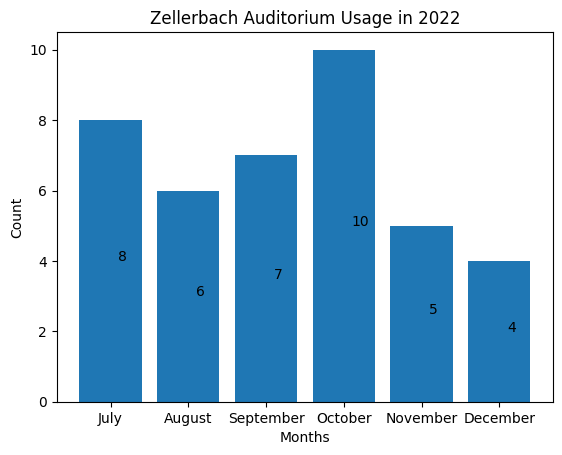

In [256]:
#constructing a dataframe for plotting purposes
zellerbach_aud_22_data = {'Months':['July', 'August', 'September', 'October', 'November', 'December'], 'Count': [8, 6, 7, 10, 5, 4]}
zellerbach_aud_22_tbl = pd.DataFrame (data = zellerbach_aud_22_data)
plot = plt.bar(zellerbach_aud_22_tbl['Months'], zellerbach_aud_22_tbl['Count'])
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Zellerbach Auditorium Usage in 2022')

for bar in plot:
  height = bar.get_height()
  label_x_pos = bar.get_x() + 0.5
  plt.text(label_x_pos, height/2, height)